# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [7]:
library(igraph)
library(dplyr)

In [8]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

X2B X410 AER X2965 KZN X2990 X X0 CR2
1 2B  410  ASF 2966  KZN 2990    0  CR2
2 2B  410  ASF 2966  MRV 2962    0  CR2
3 2B  410  CEK 2968  KZN 2990    0  CR2
4 2B  410  CEK 2968  OVB 4078    0  CR2
5 2B  410  DME 4029  KZN 2990    0  CR2
6 2B  410  DME 4029  NBC 6969    0  CR2

In [10]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B n   
1  FR  2484
2  AA  2354
3  UA  2180
4  DL  1981
5  US  1960
6  CZ  1454
7  MU  1263
8  CA  1260
9  WN  1146
10 U2  1130
11 AF  1071
12 LH   923
13 AZ   877
14 IB   831
15 KL   830
16 ZH   815
17 AB   798
18 FL   726
19 AC   705
20 TK   658

In [11]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="FR") %>% tally()

n   
1 2484

In [13]:
df2 <- df %>% filter(X2B=="FR") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

AER KZN cnt
1 AAR AGP 1  
2 AAR PMI 1  
3 AAR STN 1  
4 ACE BCN 1  
5 ACE BGY 1  
6 ACE BHX 1

In [16]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN)))) #unique - מבטל כפילויות

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [17]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [18]:
links <- as.matrix(mtx)


In [19]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [20]:
### network size by edges
E(mynet)

+ 2484/2484 edges from 284822a:
  [1] 1->  4 1->123 1->144 2->  9 2-> 12 2-> 13 2-> 16 2-> 18 2-> 22 2-> 27
 [11] 2-> 39 2-> 45 2-> 47 2-> 50 2-> 51 2-> 56 2-> 69 2-> 76 2-> 88 2-> 91
 [21] 2-> 93 2-> 95 2->105 2->106 2->111 2->120 2->139 2->140 2->143 2->144
 [31] 2->146 2->175 3-> 39 3->100 4->  1 4->  9 4-> 12 4-> 13 4-> 15 4-> 16
 [41] 4-> 18 4-> 19 4-> 22 4-> 23 4-> 25 4-> 27 4-> 35 4-> 37 4-> 39 4-> 44
 [51] 4-> 45 4-> 47 4-> 50 4-> 51 4-> 56 4-> 57 4-> 58 4-> 67 4-> 68 4-> 69
 [61] 4-> 70 4-> 73 4-> 76 4-> 88 4-> 95 4-> 98 4->100 4->105 4->106 4->108
 [71] 4->109 4->111 4->120 4->123 4->137 4->139 4->140 4->143 4->144 4->156
 [81] 4->159 4->162 4->168 4->171 5->  7 5-> 12 5-> 15 5-> 16 5-> 25 5-> 27
 [91] 5-> 37 5-> 39 5-> 41 5-> 44 5-> 45 5-> 50 5-> 57 5-> 65 5-> 67 5-> 69
+ ... omitted several edges

In [21]:
### network size by vertices (nodes)
V(mynet)

+ 176/176 vertices, from 284822a:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176

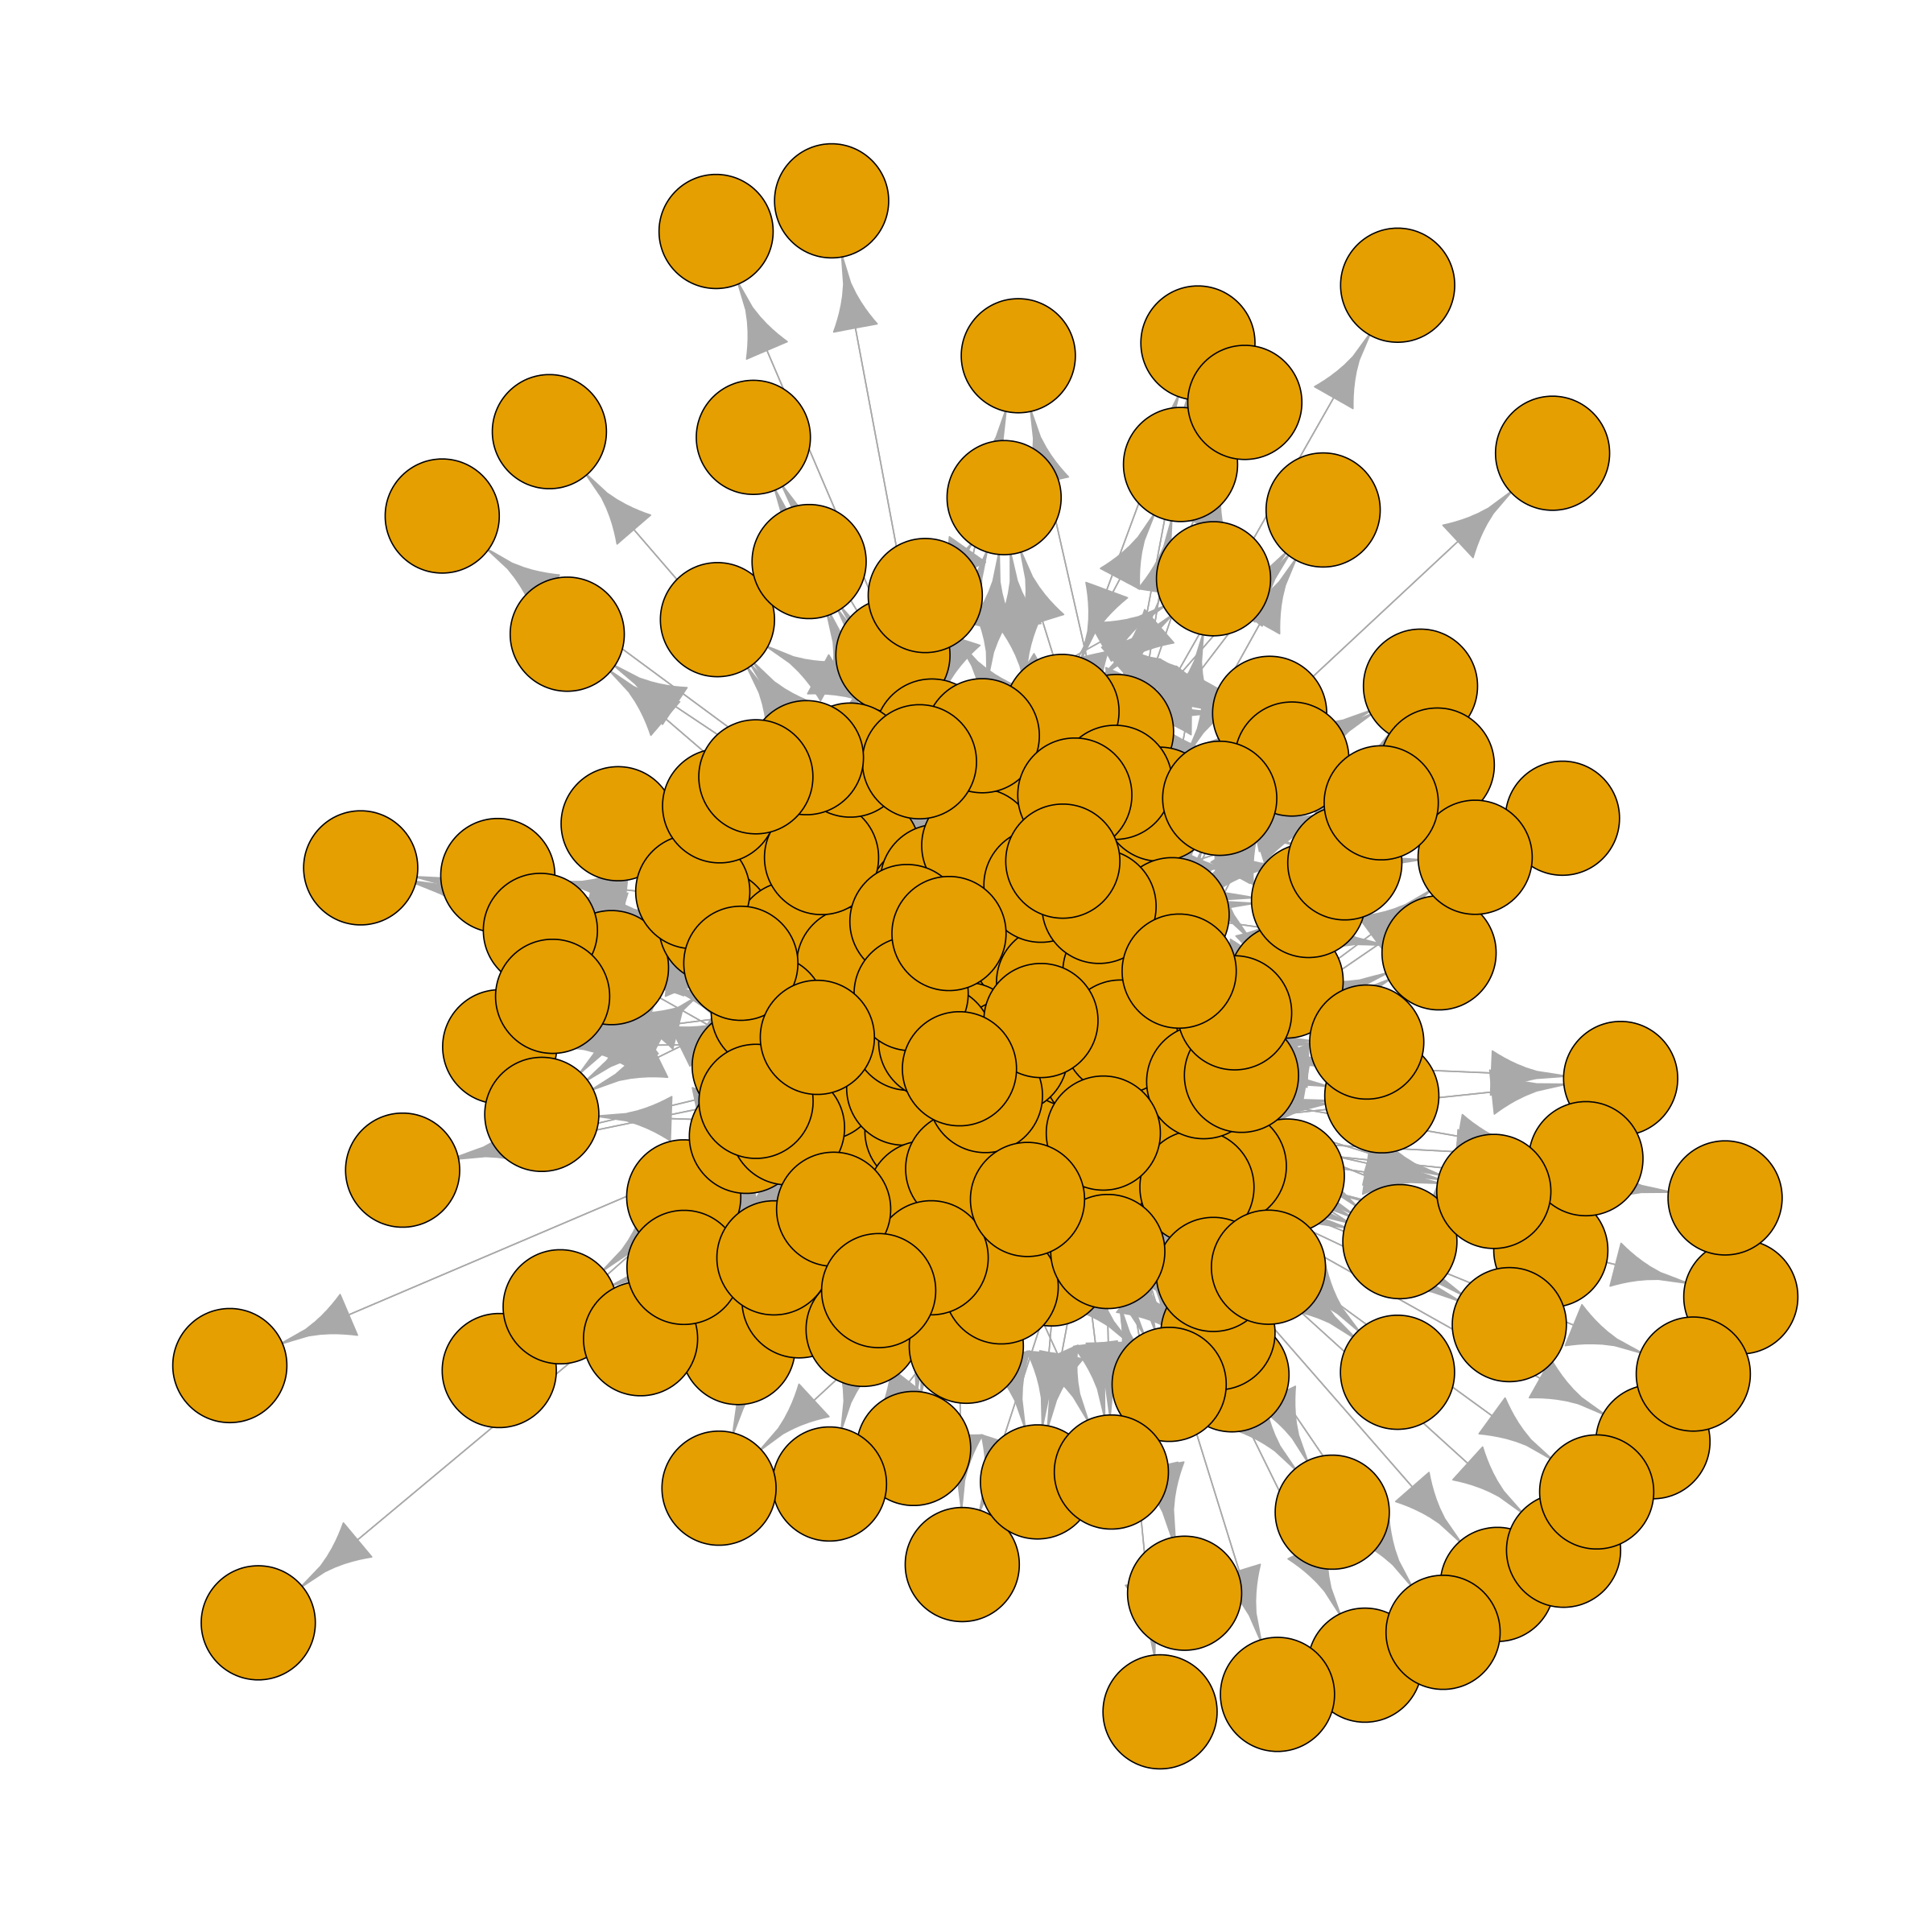

In [31]:
options(repr.plot.width = 20, repr.plot.height =20)

plot(mynet, edge.arrow.size=1, vertex.label=NA)

### Measures

In [32]:
mean_distance(mynet, directed=F)

[1] 2.16961

In [33]:
diameter(mynet, directed=F,weights=NA)

[1] 4

In [34]:
centr_degree(mynet,mode="in",normalized=T)

$res
  [1]   3  29   2  50  26  42   5   6  39  11   1  63  21   4  18  32   8  16
 [19]  25  20   1  28   9   2  15  14  46   1   3   9  21  10   1  13   5  26
 [37]  45   7  75   8   3   3   2   8  76   2  30   1   5  32  37   1  29   5
 [55]  13  15  14   2   4   1  20  11   5   1  44   2  13   6  43  24   7   5
 [73]  28   5  19  22   3   2   5   5   1   5   5   2  11   1  26  33   3   5
 [91]  18   1  30   3  36  10  28   2   3  34   8   2   2   5  12  38   3   3
[109]  24  36  14   1   1   2   4   2   4  10   2  21   2   4  49  10   8   2
[127]  43   8   5  18   6   3  13  10  10   1  35   7  13  16   2  16  18 124
[145]   9  22   2   6   1   3   2  35   2   6   1   8   4  27   6   8   7  29
[163]   5  26   1  12   2   3   1  26  18   2   3  14   5   1

$centralization
[1] 0.6279221

$theoretical_max
[1] 30800

In [35]:
edge_density(mynet,loops=F)

[1] 0.08064935

In [36]:
degree(mynet)

[1]   6  58   4 100  52  84  10  12  78  22   2 126  42   8  36  64  16  32
 [19]  50  40   2  56  18   4  30  28  92   2   6  18  42  20   2  26  10  52
 [37]  90  14 150  16   6   6   4  16 152   4  60   2  10  64  74   2  58  10
 [55]  26  30  28   4   8   2  40  22  10   2  88   4  26  12  86  48  14  10
 [73]  56  10  38  44   6   4  10  10   2  10  10   4  22   2  52  66   6  10
 [91]  36   2  60   6  72  20  56   4   6  68  16   4   4  10  24  76   6   6
[109]  48  72  28   2   2   4   8   4   8  20   4  42   4   8  98  20  16   4
[127]  86  16  10  36  12   6  26  20  20   2  70  14  26  32   4  32  36 248
[145]  18  44   4  12   2   6   4  70   4  12   2  16   8  54  12  16  14  58
[163]  10  52   2  24   4   6   2  52  36   4   6  28  10   2

In [37]:
mean(degree(mynet))

[1] 28.22727

### Clusters

In [38]:
cliques(mynet)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[[1]]
+ 1/176 vertex, from 284822a:
[1] 144

[[2]]
+ 1/176 vertex, from 284822a:
[1] 39

[[3]]
+ 1/176 vertex, from 284822a:
[1] 27

[[4]]
+ 1/176 vertex, from 284822a:
[1] 51

[[5]]
+ 1/176 vertex, from 284822a:
[1] 88

[[6]]
+ 1/176 vertex, from 284822a:
[1] 22

[[7]]
+ 1/176 vertex, from 284822a:
[1] 76

[[8]]
+ 1/176 vertex, from 284822a:
[1] 120

[[9]]
+ 1/176 vertex, from 284822a:
[1] 13

[[10]]
+ 1/176 vertex, from 284822a:
[1] 91

[[11]]
+ 1/176 vertex, from 284822a:
[1] 18

[[12]]
+ 1/176 vertex, from 284822a:
[1] 23

[[13]]
+ 1/176 vertex, from 284822a:
[1] 101

[[14]]
+ 1/176 vertex, from 284822a:
[1] 40

[[15]]
+ 1/176 vertex, from 284822a:
[1] 82

[[16]]
+ 1/176 vertex, from 284822a:
[1] 35

[[17]]
+ 1/176 vertex, from 284822a:
[1] 107

[[18]]
+ 1/176 vertex, from 284822a:
[1] 89

[[19]]
+ 1/176 vertex, from 284822a:
[1] 77

[[20]]
+ 1/176 vertex, from 284822a:
[1] 42

[[21]]
+ 1/176 vertex, from 284822a:
[1] 41

[[22]]
+ 1/176 vertex, from 284822a:
[1] 172

[[23]]
+ 1/176

In [40]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
"At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations"


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2
   [73] 1 2 1 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1
  [109] 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2
  [145] 1 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2
  [181] 1 2 1 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 2 1 2 1 2 1 2 3 2 3 3 3 2 3
  [217] 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 2 3 3 3 2 3 3 2 3 3 2 3 3 3 3 3 3 2 2 2 2
  [253] 2 2 2 2 2 1 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 3 2 3 2 3 3 3 3 3 2 2 2 2 2 1
  [289] 2 3 3 2 3 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1
  [325] 2 3 3 3 2 3 3 2 3 2 3 3 3 3 2 2 2 2 2 1 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 2
  [361] 3 3 3 3 3 3 2 2 2 2 2 2 2 2 1 2 3 2 3 3 3 2 2 3 3 3 3 3 2 2 2 2 2 1 2 3
  [397] 3 3 3 2 3 2 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 2 2
  [433] 2 2 2 2 2 2 2 2 2 2 1 2 3 2 3 2 3 3 3 2 3 3 2 3 2 3 3 3 2 2 2 1 2 3 3 3
  [469] 3 3 3 3 3 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 1 2 3 3 2 2 2 1 2 3 3 2 3 2 2 2
  [505] 1 2 3 2 3 2 1 2 3 3 3 3 2 2 2 2 1 2 3 3 2 2 2 1 2 2 1 2 3 2 2 1 2 3 3 3
  [541] 3 3 3 2 2 2 2 2 2 2 1 2 3 3 2 2 1 2 3 2 2 1 2 3 2 3 3 3 3 3 2 2 2 2 2 2
  [577] 1 2 3 2 2 1 2 3 2 2 1 2 3 3 3 2 2 2 1 2 3 2 3 2 2 1 2 3 3 2 2 1 2 3 3 2
  [613] 2 1 2 3 2 1 2 3 2 1 2 3 2 2 2 1 2 3 2 1 2 3 2 3 3 3 2 2 2 1 2 3 3 2 2 1
  [649] 2 3 2 1 2 3 3 2 3 3 2 2 1 2 3 2 1 2 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 3 4
  [685] 3 2 3 3 4 3 2 3 3 4 3 2 3 3 4 3 2 3 4 3 4 3 3 4 3 2 2 3 2 2 3 2 3 2 3 2
  [721] 3 2 3 2 2 3 2 1 2 3 2 3 2 3 2 3 4 3 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 4
  [757] 4 3 3 2 3 4 4 3 4 4 3 3 2 3 3 4 4 3 4 4 3 3 2 2 3 3 2 3 3 2 2 1 2 3 4 3
  [793] 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 4 3 3 4 3 3 2 3 4 3 3 4 3 2 3 4 3 3 4 3
  [829] 4 3 2 3 4 3 3 4 3 3 2 3 2 3 2 2 3 3 2 3 2 2 1 2 3 2 3 3 2 2 1 2 3 4 3 4
  [865] 3 2 3 3 4 3 2 3 2 2 3 2 1 2 3 4 4 3 3 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2
  [901] 3 3 3 2 3 3 2 3 3 3 3 3 2 2 2 2 2 1 2 3 4 3 3 2 3 3 2 3 4 3 3 2 3 3 2 3
  [937] 2 2 1 2 3 4 4 3 4 4 4 3 3 3 2 3 4 4 3 4 4 4 3 3 3 2 3 3 2 3 3 3 3 3 3 2
  [973] 2 2 2 2 2 1 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2 3 3 2 3 3 3 3 2 2 2 2 1 2
 [1009] 3 4 3 2 3 3 3 2 2 2 1 2 3 3 2 3 4 4 3 3 2 3 3 2 2 1 2 3 4 3 2 3 4 3 2 3
 [1045] 4 3 2 3 4 3 2 2 3 2 3 2 1 2 3 4 4 3 3 2 3 2 3 3 2 2 1 2 3 2 3 4 3 4 4 3
 [1081] 3 3 2 3 2 3 3 2 2 2 2 2 1 2 3 4 3 4 5 4 3 4 3 2 3 4 3 2 3 4 5 4 3 4 3 2
 [1117] 3 3 4 3 2 3 4 3 4 3 4 3 4 3 2 3 2 3 3 4 3 2 3 2 3 3 4 3 2 3 3 4 3 2 3 4
 [1153] 3 3 4 3 2 3 2 2 3 2 1 2 3 4 3 4 3 4 3 4 3 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4
 [1189] 5 5 4 4 3 4 4 3 3 2 3 4 3 3 2 3 4 4 3 3 3 2 3 4 4 4 3 3 3 3 2 3 4 4 4 3
 [1225] 3 3 2 3 4 4 3 4 4 4 3 3 3 2 3 4 3 4 4 4 3 3 3 3 2 3 2 3 3 3 2 3 3 3 2 2
 [1261] 2 2 2 1 2 3 4 4 3 3 2 3 4 5 5 4 5 5 5 4 4 4 3 4 4 3 4 4 4 4 3 3 3 3 2 3
 [1297] 4 5 5 5 4 4 4 3 4 4 4 3 3 3 2 3 3 4 3 2 3 3 2 3 4 5 4 4 5 4 3 4 5 4 4 5
 [1333] 4 3 4 3 3 4 3 2 3 4 4 5 5 4 5 5 4 4 3 3 4 4 3 4 4 3 3 2 3 4 4 5 4 3 4 5
 [1369] 4 4 5 4 3 4 3 3 4 3 2 3 3 3 2 3 4 4 4 3 4 3 4 4 3 4 3 4 4 4 4 4 3 3 3 3
 [1405] 3 3 2 3 4 3 4 3 4 4 4 3 4 3 4 4 3 4 4 3 4 4 4 4 4 4 3 3 3 3 3 3 3 2 3 2
 [1441] 3 2 3 2 3 2 3 3 3 2 3 2 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2
 [1477] 2 2 2 2 2 1 2 3 4 3 4 3 4 3 4 3 2 3 4 4 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 4
 [1513] 3 4 5 4 5 4 3 4 5 4 3 4 3 4 3 2 3 4 4 4 3 3 3 2 3 4 4 4 3 3 3 2 3 4 4 3
 [1549] 4 4 4 3 3 3 2 3 4 3 4 4 4 3 3 3 2 3 2 3 3 2 3 3 3 3 2 2 2 2 1 2 3 4 5 5
 [1585] 4 4 3 4 5 5 5 4 4 4 3 4 5 5 5 4 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 4 4
 [1621] 5 4 3 4 4 5 4 5 4 3 4 4 5 4 3 3 4 3 4 3 2 3 4 5 5 4 5 5 4 4 3 4 5 5 4 5
 [1657] 5 4 4 3 4 5 5 4 5 5 4 4 3 4 4 3 4 4 3 3 2 3 4 4 3 4 4 4 4 3 3 3 3 2 3 4
 [1693] 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 4 4 4 3 4 4 3 4 4 3 4 4 4 4 4 3 3 3
 [1729] 3 3 2 3 4 4 4 3 4 4 3 4 4 4 4 4 3 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 2 3 3 2
 [1765] 3 3 3 3 3 3 3 2 2 2 2 2 2 2 1 2 3 4 5 5 4 4 3 4 5 5 4 4 3 4 5 5 4 4 3 4
 [18

In [41]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
"At cliques.c:1087 :directionality of edges is ignored for directed graphs"


[[1]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  37   9 170 123 137

[[2]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  37   9   4 123 137

[[3]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  16   9 170 123 137

[[4]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  16   9   4 123 137

[[5]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  12   9 170 123 137

[[6]]
+ 8/176 vertices, from 284822a:
[1]  95  45  39  12   9   4 123 137

[[7]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  37 123 137   9 170

[[8]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  37 123 137   9   4

[[9]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  16 137 123   9 170

[[10]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  16 137 123   9   4

[[11]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  12   9 123 137 170

[[12]]
+ 8/176 vertices, from 284822a:
[1]  95  45  27  12   9 123 137   4

[[13]]
+ 8/176 vertices, from 284822a:
[1]  47  45  39   9 140   4  37 123

[[14]]
+ 8/176 vertic

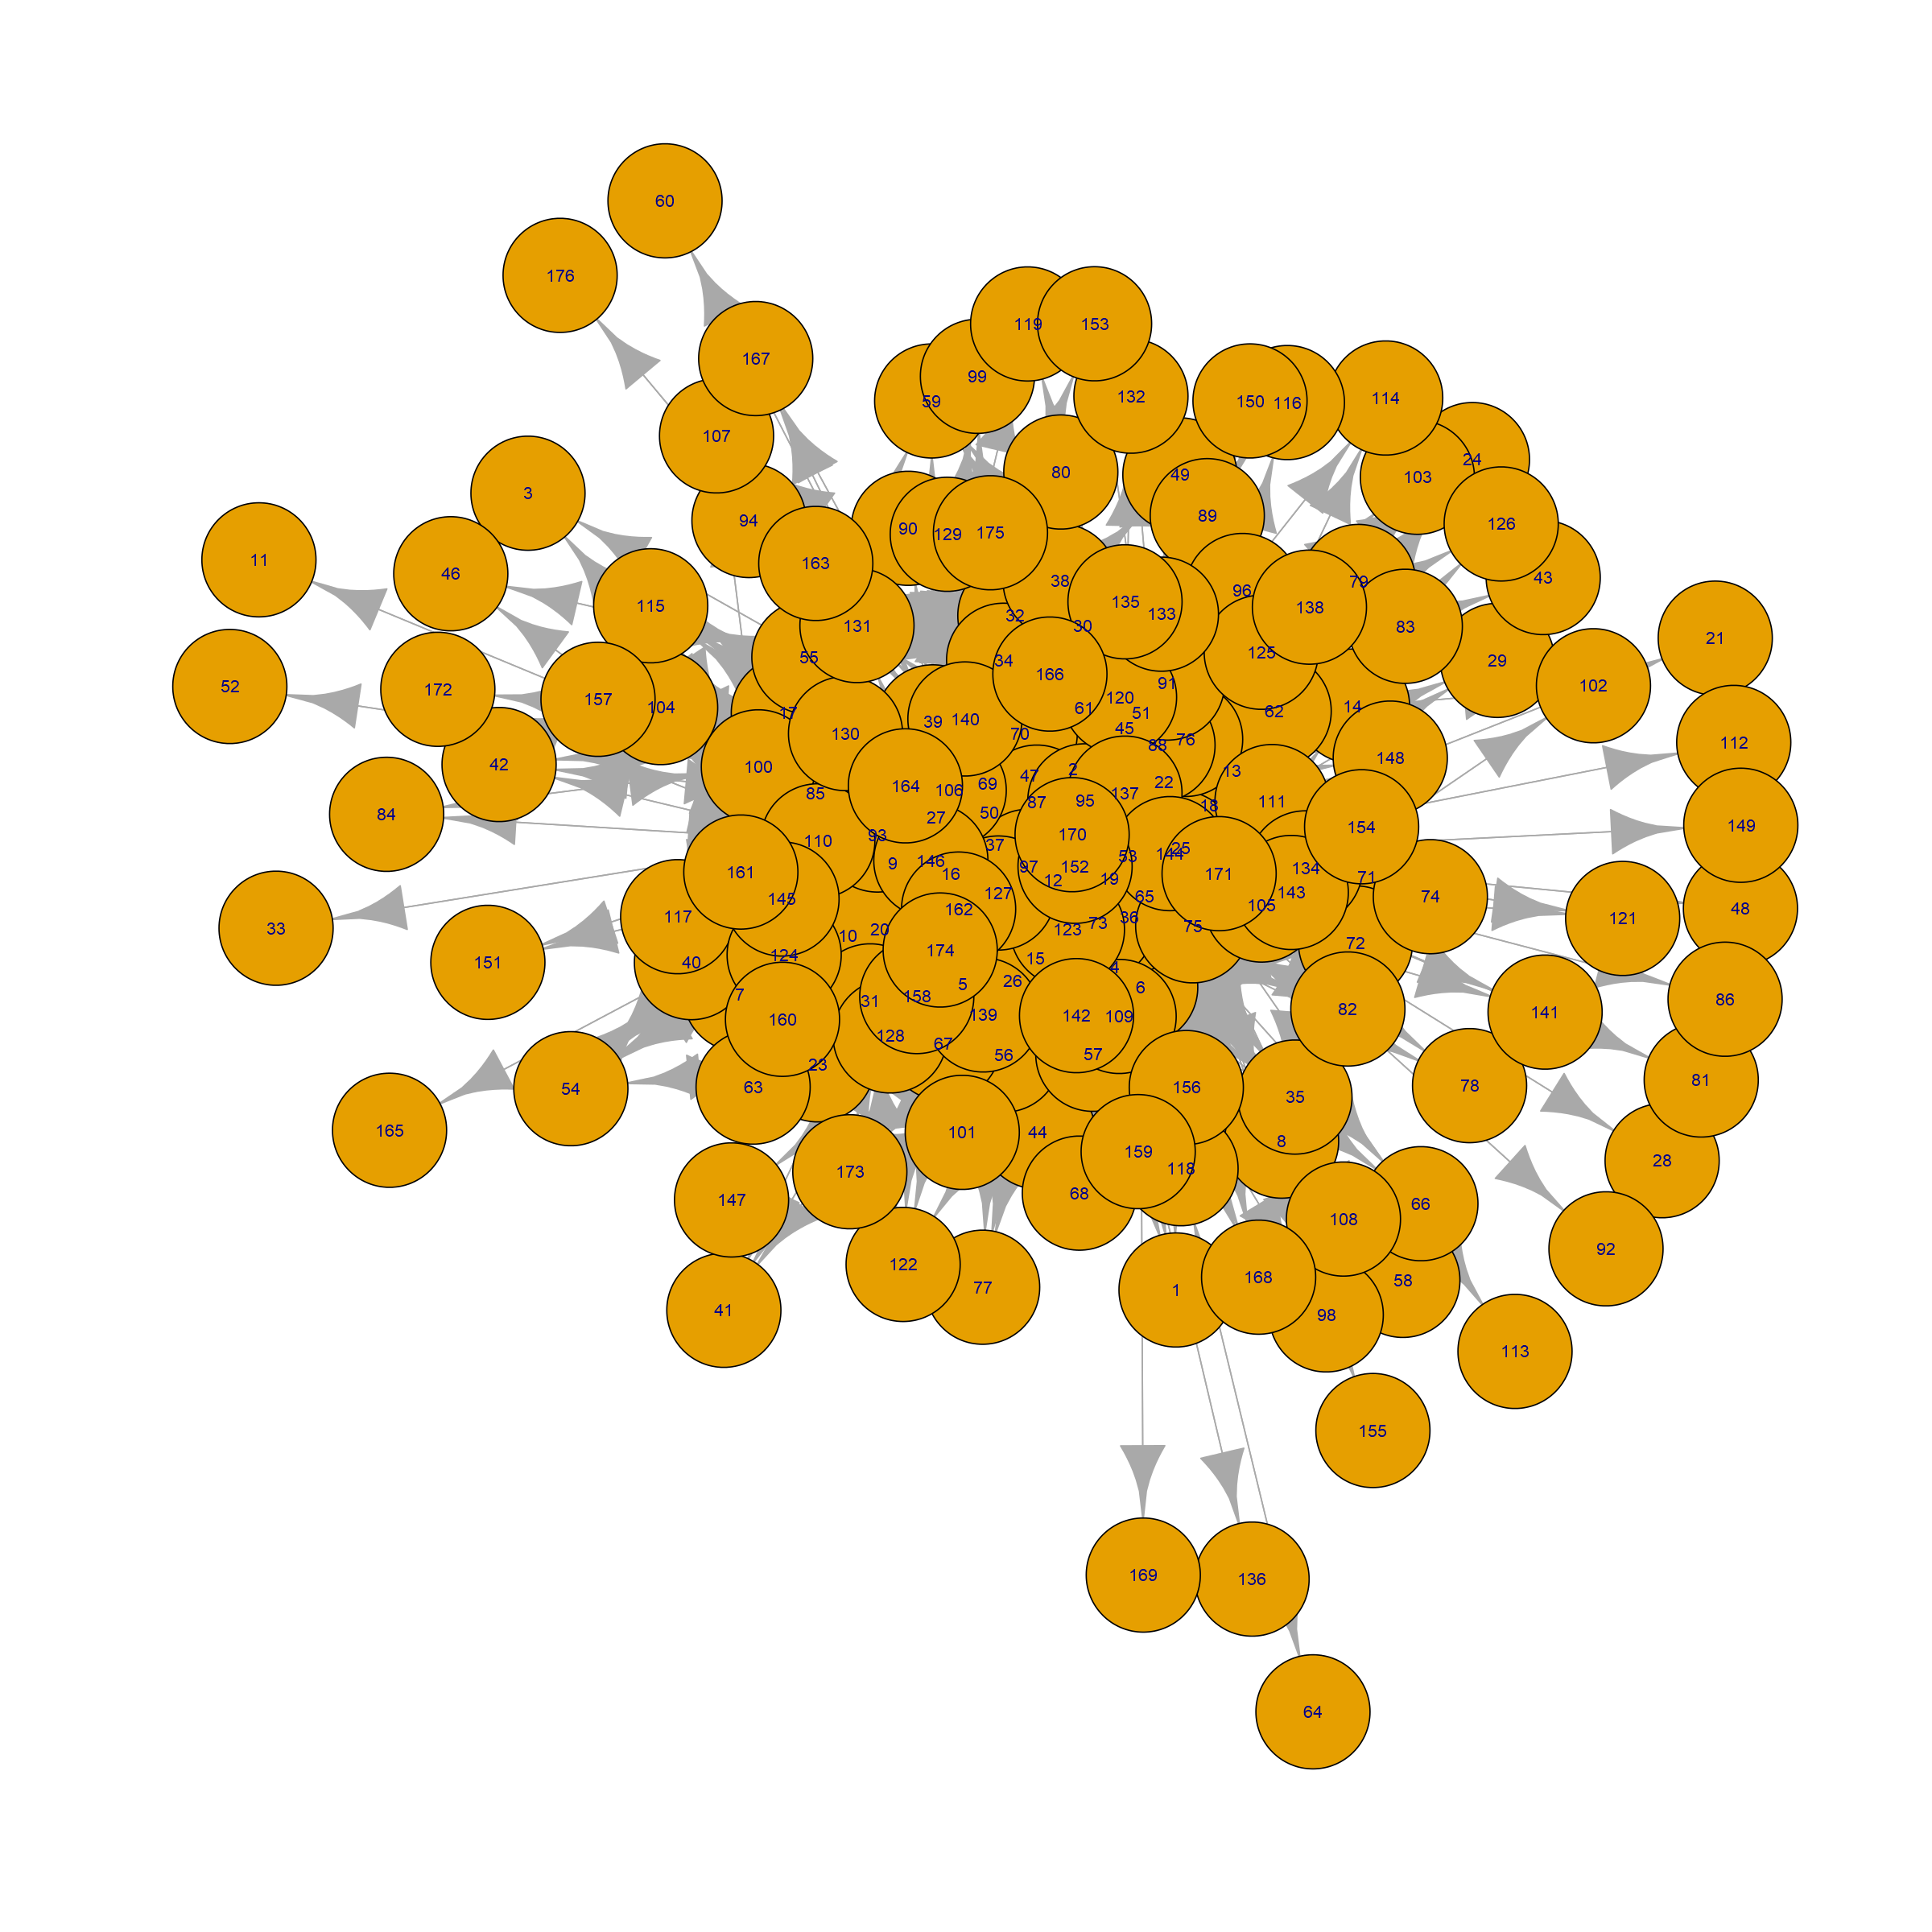

In [42]:
plot(as.directed(mynet))

### Hubs

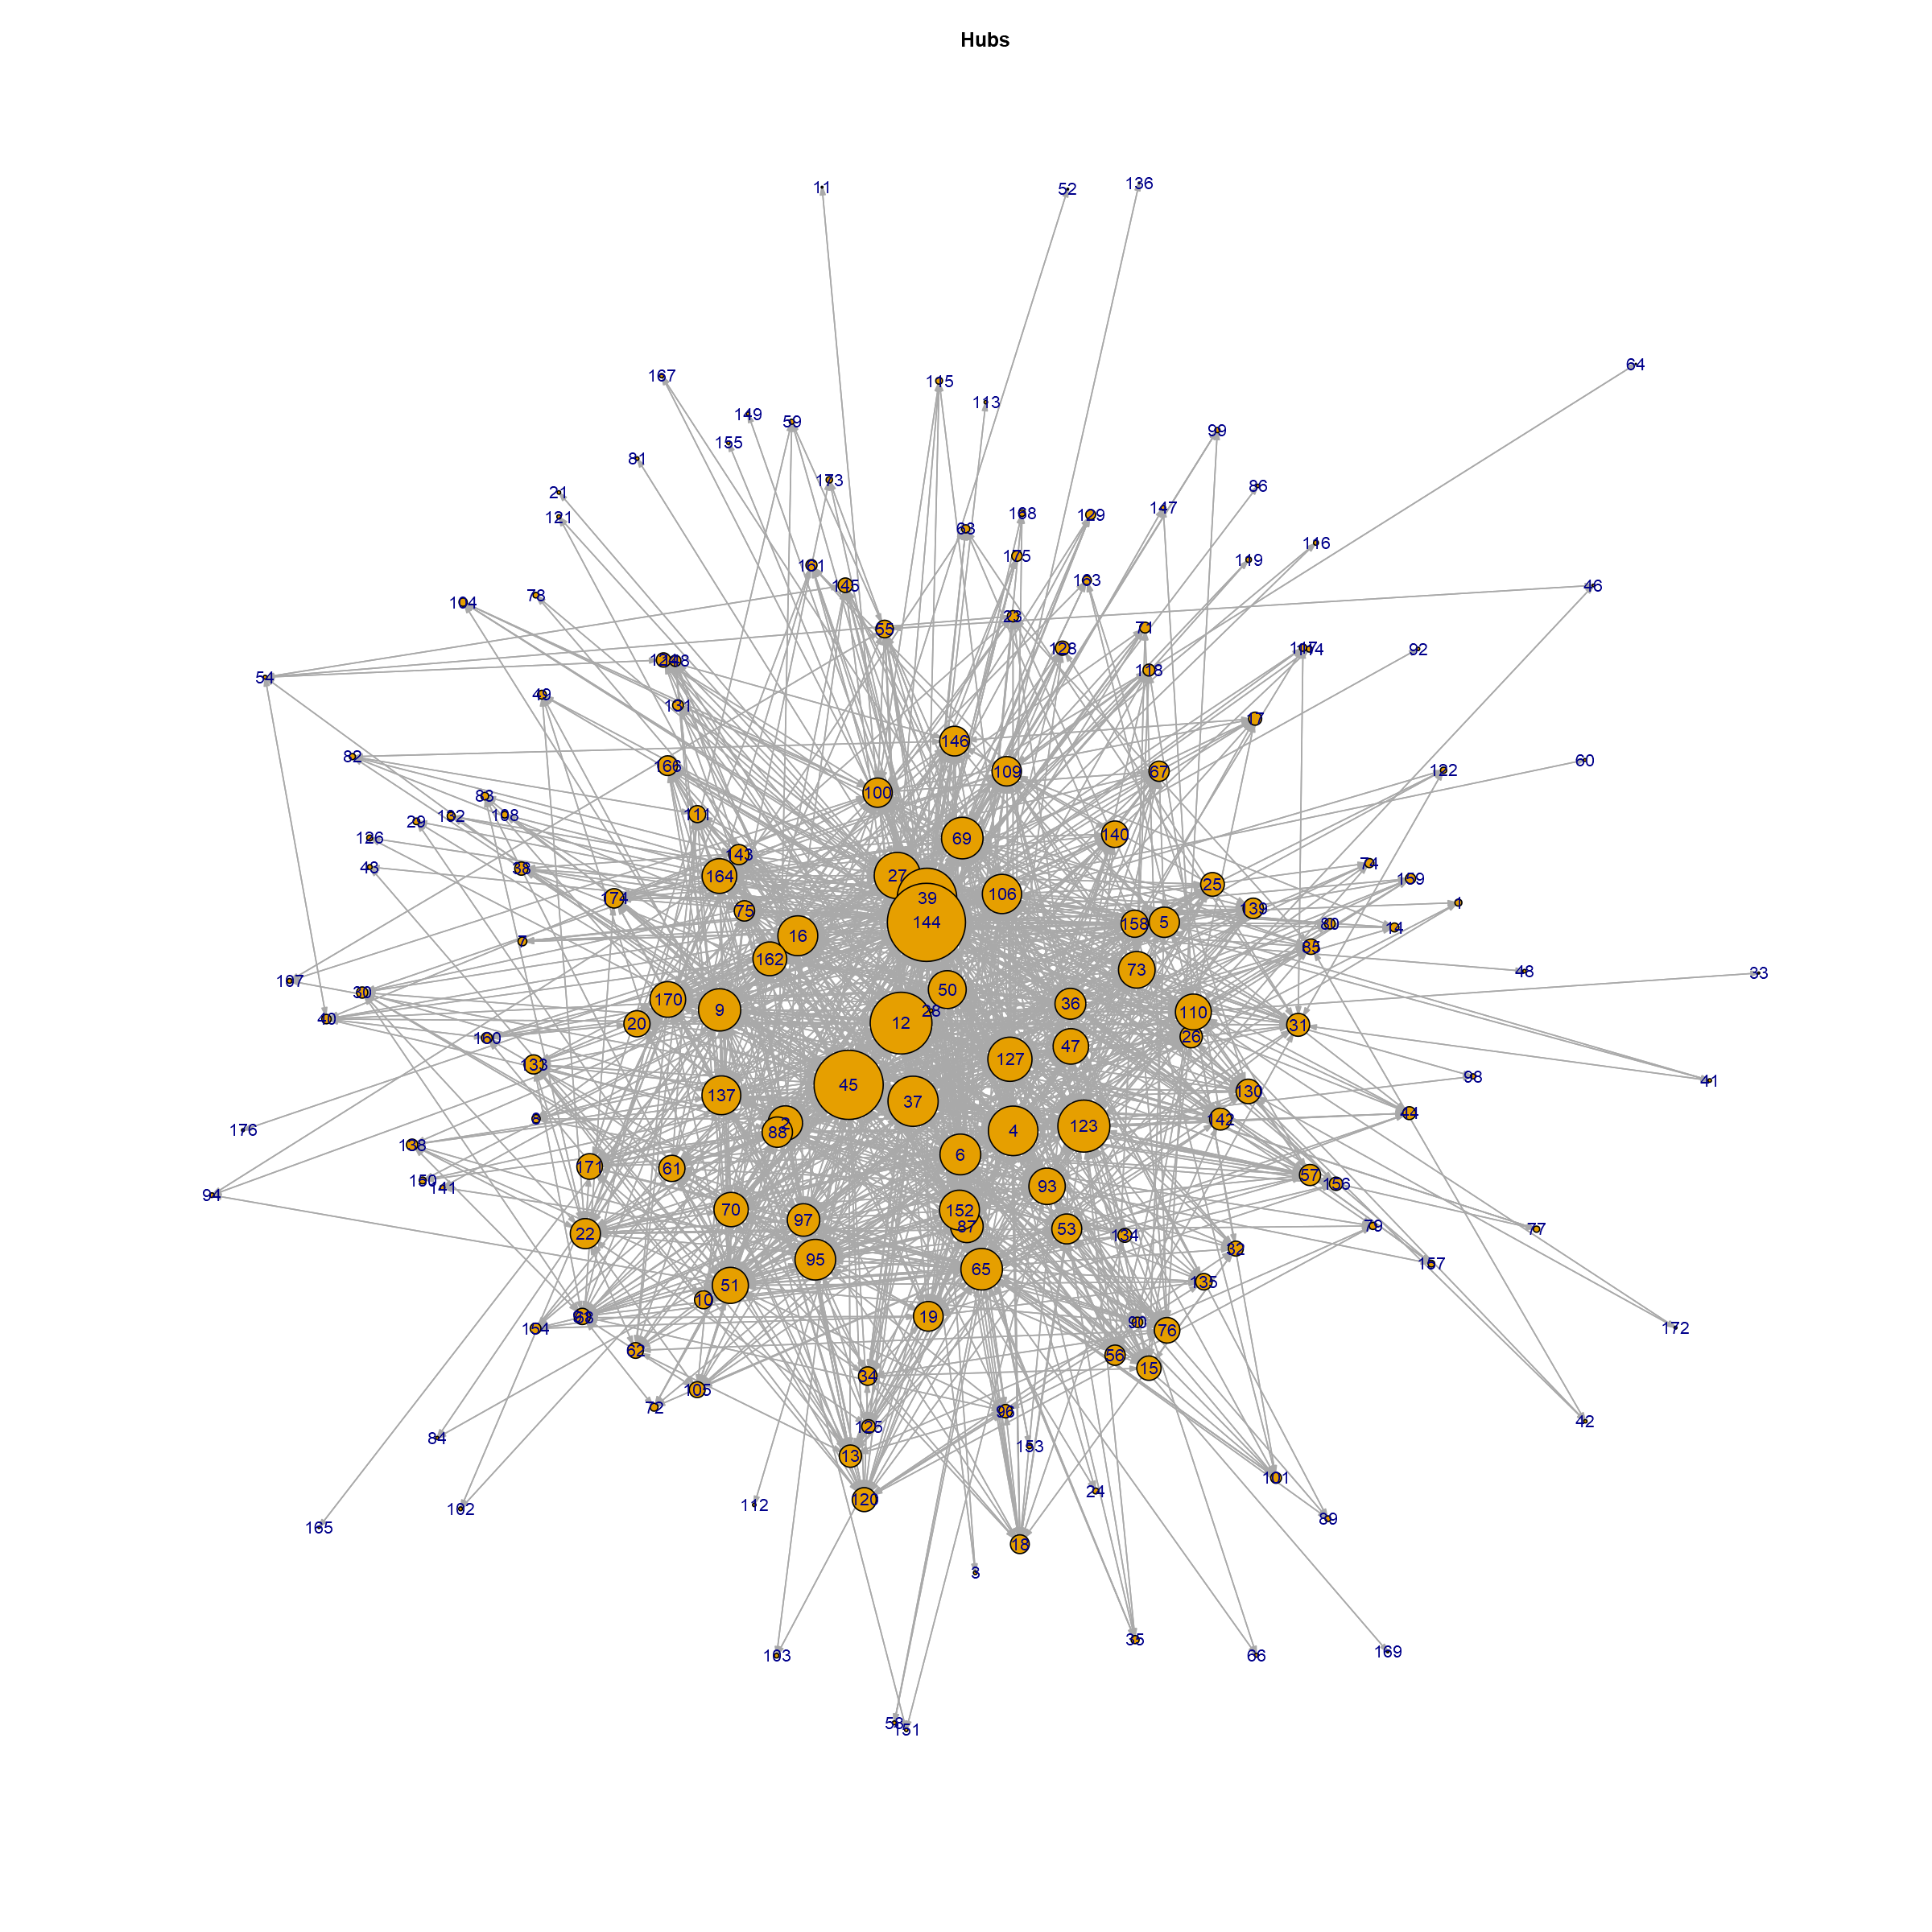

In [44]:
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 10,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

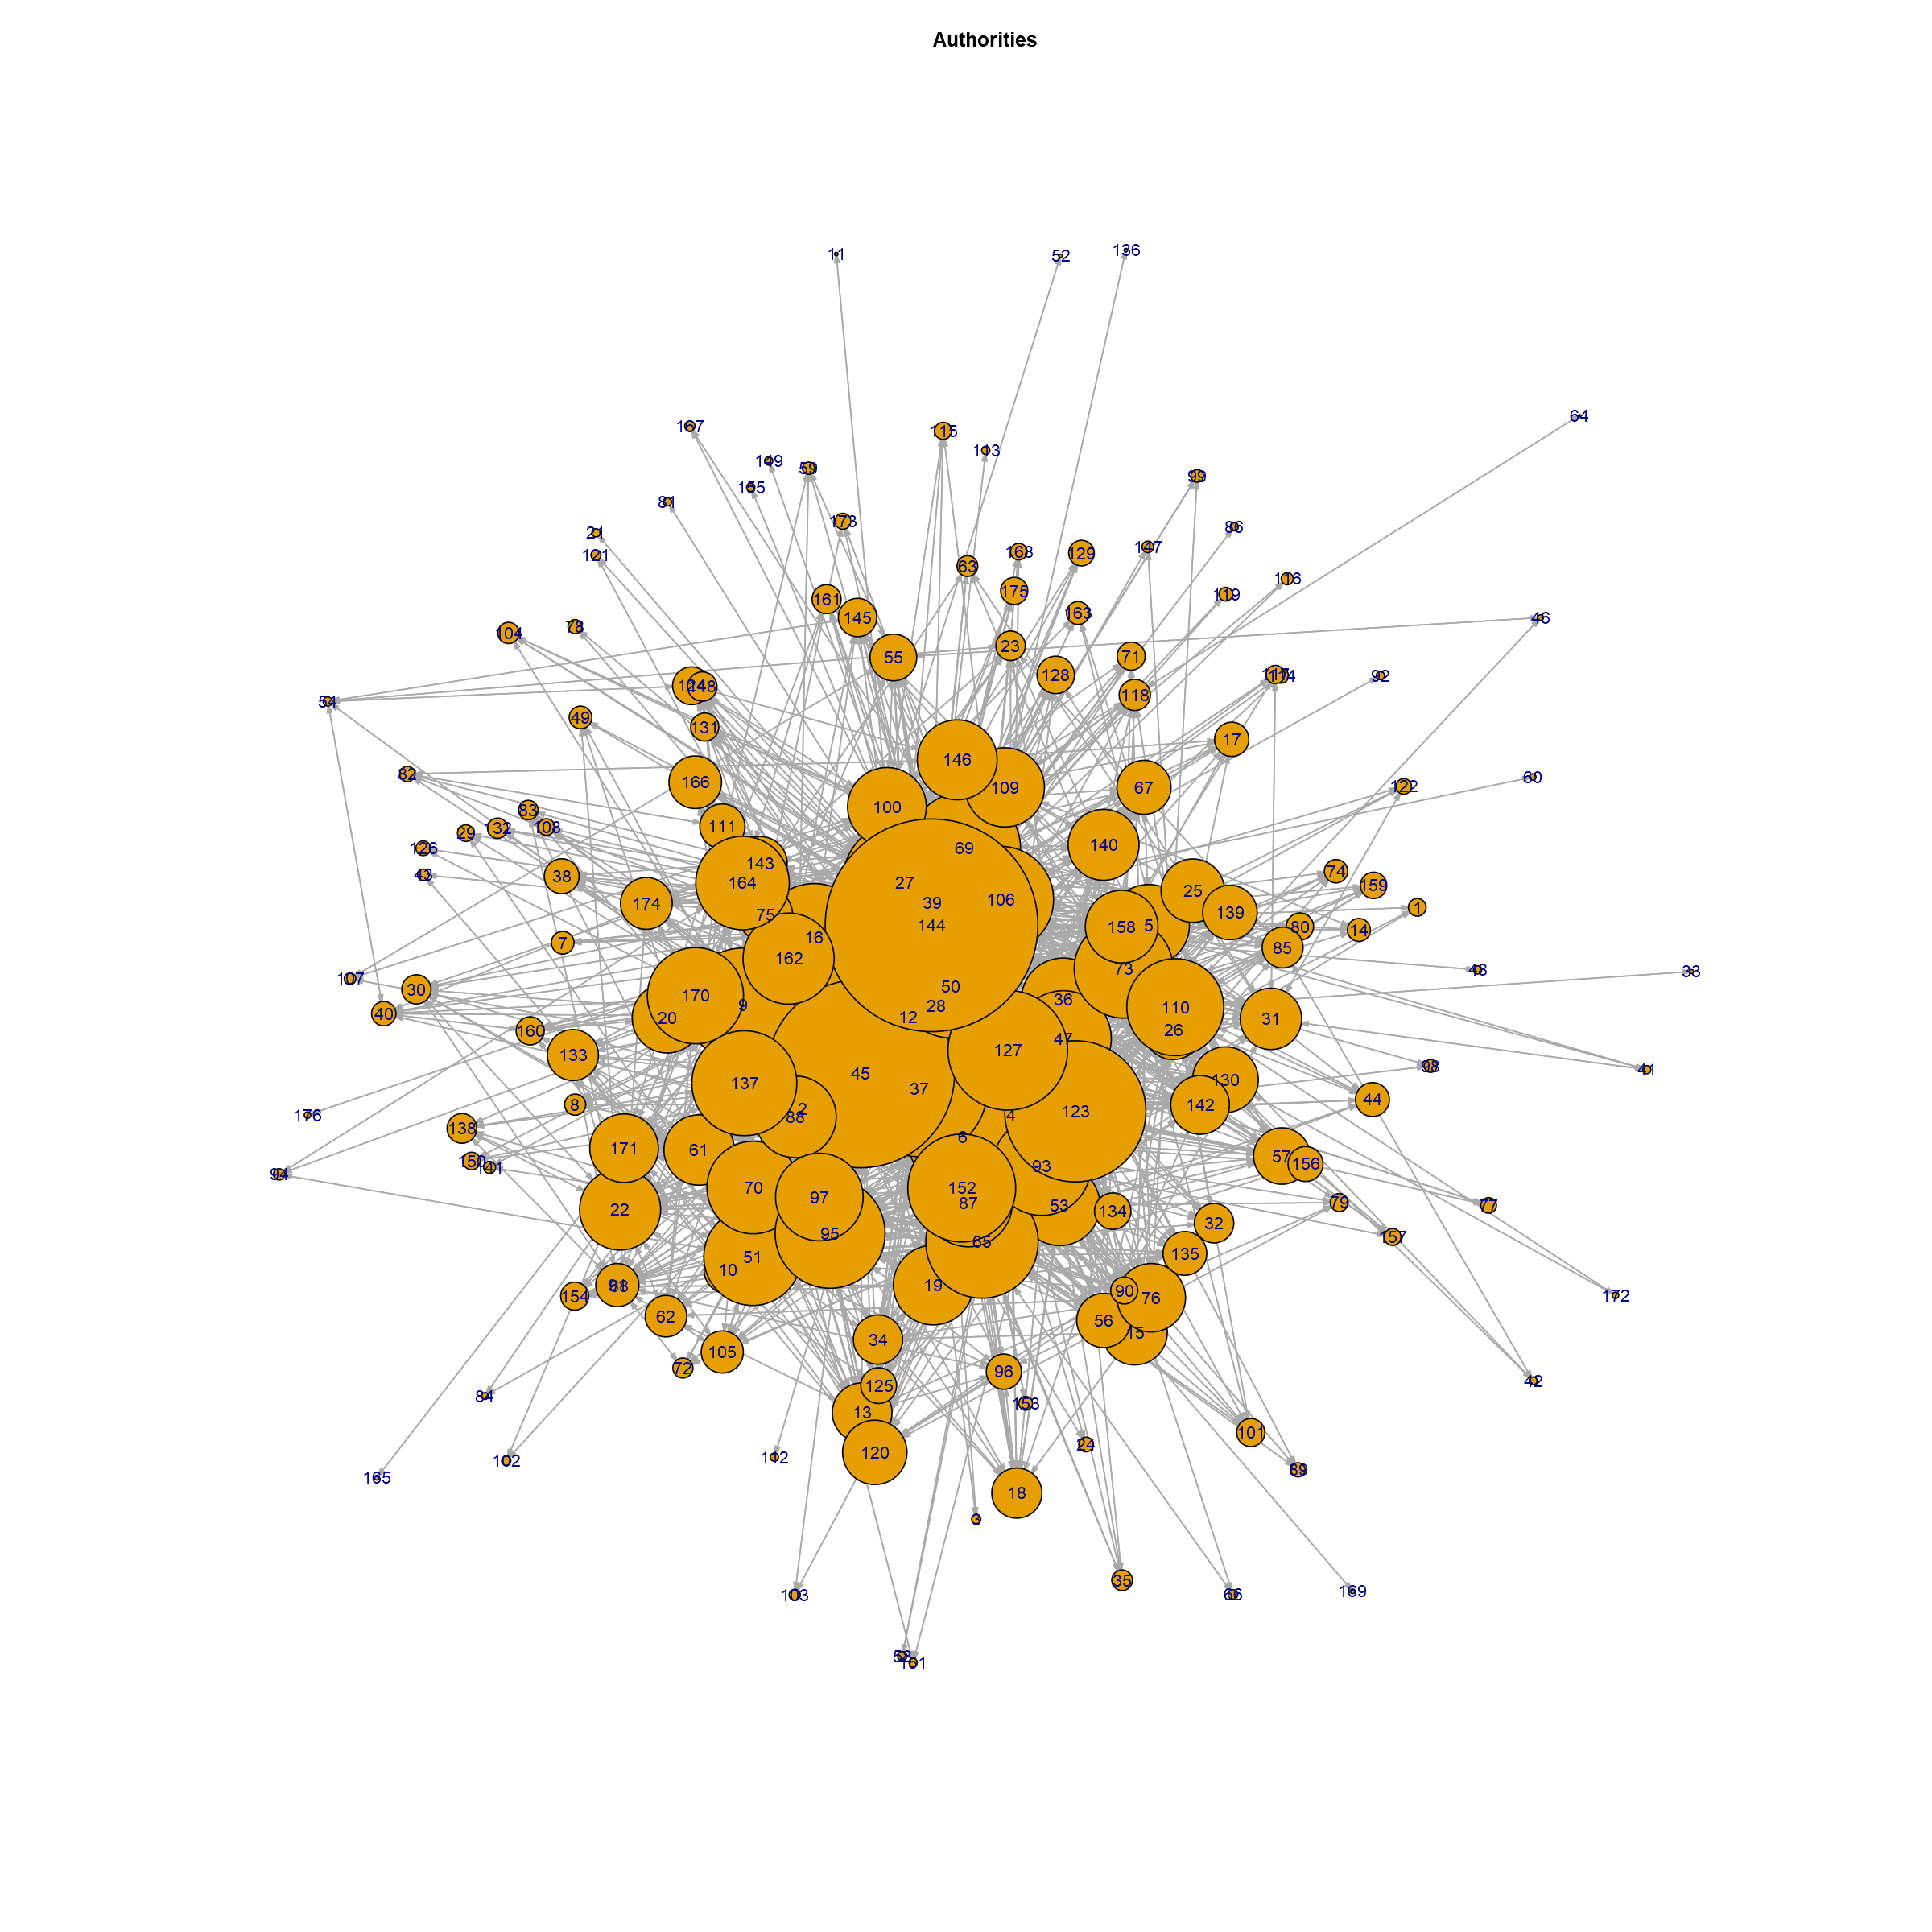

In [45]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

Warning message in cluster_edge_betweenness(mynet):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”Warning message in cluster_edge_betweenness(mynet):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”

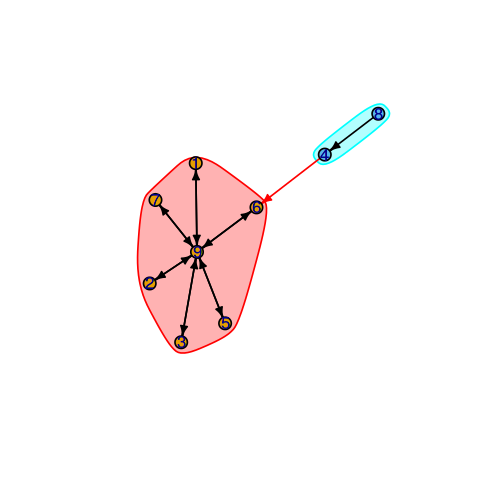

In [44]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

In [47]:
btwn <- cluster_edge_betweenness(mynet)
btwn

Warning message in cluster_edge_betweenness(mynet):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”Warning message in cluster_edge_betweenness(mynet):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”

IGRAPH clustering edge betweenness, groups: 2, mod: 0.12
+ groups:
  $`1`
  [1] 1 2 3 5 6 7 9
  
  $`2`
  [1] 4 8
  

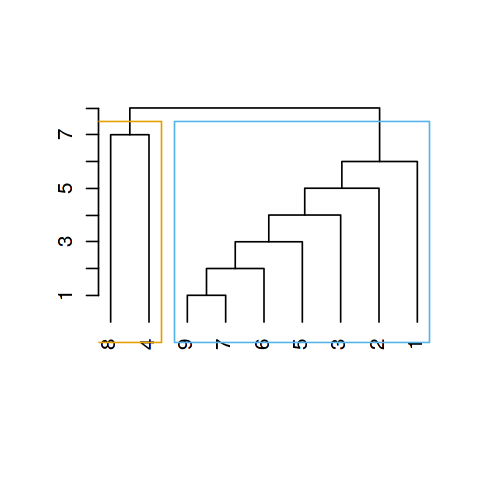

In [48]:
dendPlot(btwn, mode="hclust")

In [45]:
length(btwn)

[1] 2

In [46]:
membership(btwn)

[1] 1 1 1 2 1 1 1 2 1